# Telecom Churn Case Study

### Problem Statement

In the telecom industry of India and Southeast Asia, customers are able to choose from multiple service providers and actively switch from one operator to another resulting high churn rate.Customer acquisition is more expensive than customer retension.Hence, to reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Modelling Goal :
1. Build predictive model to identify high value customers will churn or not.
2. Identify main indicator of churn.

In [47]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Setting display option to show all columns and values
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [48]:
# Extracting the telecom data
telecom = pd.read_csv("telecom_churn_data.csv")

telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [49]:
telecom.tail(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99989,7000964736,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,154.687,112.050,141.253,128.208,35.09,24.44,28.84,14.98,191.36,144.43,145.81,144.41,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,30.39,24.44,20.78,14.98,182.64,129.31,111.29,136.29,4.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,217.99,153.76,132.08,151.28,4.70,0.00,8.06,0.0,3.36,14.21,25.54,8.11,0.40,0.90,8.96,0.0,0.0,0.0,0.0,0.0,8.46,15.11,42.58,8.11,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,226.46,168.88,174.66,159.39,87.03,108.56,38.06,14.69,161.84,118.69,107.31,127.78,6.73,0.00,0.00,4.88,255.61,227.26,145.38,147.36,0.0,0.0,0.0,0.0,0.00,6.26,24.28,0.00

#### Checking the telecom dataset

In [50]:
# check for row and columns in dataset
telecom.shape

(99999, 226)

In [51]:
telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [52]:
telecom.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [53]:
# creating backup of original dataset

original_df = telecom.copy()

## Data Exploration and Data Cleaning

In [54]:
# check if any duplicate row is present in dataset
sum(telecom.duplicated())

0

There are no duplicate entries in the dataset.

In [55]:
# checking rows with all null values
telecom.isnull().all(axis = 0).sum()

0

There are no rows with all values as null

In [56]:
#checking for columns with single unique value
unique_val_col = telecom.columns[telecom.nunique()==1]
unique_val_col

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [57]:
# Remove columns with unique values as it will not give much information for modelling

telecom.drop(unique_val_col,axis = 1,inplace = True)

#### Check for columns which have all the different values.(100% variance in column)

In [58]:
# checking columns having all unique values
all_diff_val_col = telecom.columns[telecom.nunique() == len(telecom.index)]
all_diff_val_col

Index(['mobile_number'], dtype='object')

In [59]:
# drop the column with all unique values
telecom.drop(all_diff_val_col,axis = 1,inplace =True)

In [60]:
# check the shape of dataset
telecom.shape

(99999, 209)

### Missing value treatment

In [61]:
# checking for % of null values in each column

round(100*(telecom.isnull().sum(axis = 0).sort_values(ascending=False)/len(telecom.index)),2)

total_rech_data_6           74.85
count_rech_2g_6             74.85
arpu_2g_6                   74.85
arpu_3g_6                   74.85
av_rech_amt_data_6          74.85
count_rech_3g_6             74.85
fb_user_6                   74.85
night_pck_user_6            74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
fb_user_7                   74.43
fb_user_9                   74.08
arpu_2g_9                   74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
av_rech_amt_data_9          74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user

In [62]:
# columns having missing data more than 70%

col_70_per_null = telecom.columns[round(100*(telecom.isnull().sum(axis = 0)/len(telecom.index)),2)>70.00]

col_70_per_null

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

Lets not remove these above column. Will try and see if any columns can be imputed with data now

After checking data and  each column, it is observed that if date_of_last_rech_data_6/7/8/9 is blank then respective column values are null for below columns ,meaning user has not recharged the mobile, hence recharge amount can be imputed as zero.

Impacted columns as below : <br>
total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9	
max_rech_data_6,max_rech_data_7,max_rech_data_8	,max_rech_data_9
av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9

In [63]:
# Lets impute these columns with Zero (0)

impute_zero_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]


# impute missing/null values with 0
telecom[impute_zero_col] = telecom[impute_zero_col].apply(lambda x: x.fillna(0))

# check for % of missing values for these columns

telecom[impute_zero_col].isnull().sum()*100/telecom.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [64]:
# lets categorise numerical and categorical columns for further analysis

num_col = telecom.select_dtypes(include =['int64', 'float64','int32']).columns

print("Numerical columns are :\n {0} ".format(num_col))

cat_col = telecom.select_dtypes(include=['object']).columns

print("Categorical columns are :\n {0} ".format(cat_col))

Numerical columns are :
 Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=201) 
Categorical columns are :
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object') 


#### Missing value for Categorical Columns

1. Lets check below columns usage :

date_of_last_rech_data_6/7/8/9
We have already make use of this column to impute zero values for missing data for recharge columns. Value contain in these columns are respective dates of last recharge for the respective months. So not much information we are getting from this column now. So can be dropped.<br>

2, Lets check below column usage : <br>

date_of_last_rech_6/7/8/9

As checked/analysed in data set, total_rech_amt_6/7/8/9 are already update and its date for respective month only so not much information we are getting from this column. Hence these columns do not contribute much to the model building,so can be dropped

In [65]:
# drop columns as mentioned above from point 1 to 4

col_to_drop = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_9', 'date_of_last_rech_data_6','date_of_last_rech_data_7', 'date_of_last_rech_data_8','date_of_last_rech_data_9']

# drop columns from data set

telecom.drop(col_to_drop , axis = 1 , inplace = True)

# check the shape again

telecom.shape

(99999, 201)

#### Treating missing values for Numerical columns

In [66]:
# Separate out only sixth month data (columns ending with suffix '_6')
col_6 = []
col_6.extend(list(filter(lambda x: x.endswith('_6'), telecom.columns)))
col_6.extend(['jun_vbc_3g'])
# Now check for individual month , how data is spread across features

telecom[col_6].head(5)

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6,jun_vbc_3g
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,252,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0,101.20
1,34.047,24.11,15.74,0.0,0.0,23.88,11.51,0.00,0.0,35.39,0.23,0.00,0.00,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,5.90,26.83,0.00,1.83,0.00,4,74,44,44,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
2,167.690,11.54,143.33,0.0,0.0,7.19,29.34,24.11,0.0,60.66,4.34,41.81,1.48,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,139.33,370.04,0.21,0.00,0.93,5,168,86,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,4.17
3,221.338,99.91,123.31,0.0,0.0,73.68,107.43,1.91,0.0,183.03,26.23,2.99,0.00,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,45.99,280.08,0.59,0.00,0.00,10,230,60,30,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
4,261.636,50.31,76.96,0.0,0.0,50.31,67.64,0.00,0.0,117.96,0.00,9.31,0.00,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,1.93,216.44,0.00,0.00,0.48,5,196,56,50,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0,0.00


In [67]:
# Separate out only seventh month data (columns ending with suffix '_7')
col_7 = []
col_7.extend(list(filter(lambda x: x.endswith('_7'), telecom.columns)))
col_7.extend(['jul_vbc_3g'])
# Now check for individual month .how data is spread across features

telecom[col_7].head(5)

,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,last_day_rch_amt_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,fb_user_7,jul_vbc_3g
0,214.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,3,252,252,252,1.0,252.0,0.0,1.0,252.0,1.32,150.76,212.17,212.17,0.0,0,0,1,0,1.0,0.0
1,355.074,78.68,99.84,0.00,0.00,74.56,75.94,0.00,2.91,150.51,4.11,0.46,0.00,4.58,0.0,23.43,0.0,178.53,29.91,65.38,8.93,104.23,0.00,0.00,0.00,0.00,104.23,0.0,0.00,0.00,9,384,154,23,1.0,154.0,1.0,0.0,154.0,108.07,0.00,0.00,28.61,0.0,1,0,0,0,1.0,0.0
2,189.058,55.24,220.59,0.00,0.00,28.74,16.86,21.79,135.54,67.41,26.49,67.41,14.76,108.68,0.0,236.84,0.0,412.94,71.11,15.44,122.29,208.86,71.29,177.01,58.34,306.66,519.53,0.0,0.85,3.14,4,315,200,200,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.0
3,251.102,54.39,109.01,54.86,28.09,34.81,83.21,0.65,0.00,118.68,14.89,1.73,0.00,16.63,0.0,0.00,0.0,135.31,19.98,64.51,27.09,111.59,66.44,38.56,0.00,105.01,216.61,0.0,0.00,0.00,11,310,50,50,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.0
4,309.876,149.44,91.88,0.00,0.00,149.44,91.88,0.00,0.00,241.33,0.00,0.00,0.00,0.00,0.0,0.00,0.0,241.33,88.49,109.54,0.00,198.04,0.00,0.25,0.00,0.25,198.29,0.0,0.00,0.00,6,350,110,110,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.0


In [68]:
# Separate out only eighth month data (columns ending with suffix '_8')
col_8 = []
col_8.extend(list(filter(lambda x: x.endswith('_8'), telecom.columns)))
col_8.extend(['aug_vbc_3g'])
# Now check for individual month .how data is spread across features

telecom[col_8].head(10)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,2,252,252,252,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0,30.40
1,268.321,7.68,304.76,0.00,0.00,7.68,291.86,0.00,0.00,299.54,0.00,0.13,0.00,0.13,0.00,12.76,0.0,312.44,29.23,375.58,3.61,408.43,2.35,12.49,0.00,14.84,423.28,0.00,0.00,0.00,11,283,65,30,2.0,25.0,2.0,0.0,50.0,365.47,0.00,0.00,7.60,0.0,0,2,0,0,1.0,0.00
2,210.226,37.26,208.36,0.00,0.00,13.58,38.46,15.61,45.76,67.66,22.58,75.53,22.83,120.94,0.00,96.84,0.0,285.46,67.46,38.89,49.63,155.99,28.69,167.09,43.23,239.03,395.03,0.00,0.00,0.00,2,116,86,86,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
3,508.054,310.98,71.68,44.38,39.04,10.61,22.46,4.91,0.00,37.99,289.58,6.53,0.00,296.11,0.00,18.09,0.0,352.21,8.04,20.28,19.84,48.18,0.00,4.94,0.00,4.94,53.13,0.00,0.00,0.00,18,601,50,50,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
4,238.174,83.89,124.26,0.00,0.00,83.89,124.26,0.00,0.00,208.16,0.00,0.00,0.00,0.00,0.00,0.00,0.0,208.16,233.81,104.13,0.00,337.94,0.86,0.00,0.00,0.86,338.81,0.00,0.00,0.00,3,287,110,110,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
5,83.386,85.48,14.46,0.00,0.00,85.48,12.38,0.00,0.00,97.86,0.00,0.00,2.08,2.08,0.00,0.00,0.0,99.94,56.26,62.46,0.00,118.73,0.00,0.00,37.93,37.93,157.13,0.23,0.00,0.23,3,130,130,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
6,255.114,76.66,92.08,0.00,0.00,76.14,80.63,0.00,0.00,156.78,0.51,11.45,0.00,11.96,0.00,0.00,0.0,168.74,1896.43,265.28,2.51,2164.23,0.00,2.60,0.00,2.60,2167.11,0.00,0.00,0.28,11,294,50,10,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.00,31.59,15.14,7,3638,1580,779,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,57.74
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.00,0.00,0.00,14,120,30,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.00,0.0,0,3,0,0,1.0,21.03
9,170.231,22.43,78.34,0.00,0.00,22.43,34.93,0.00,0.00,57.36,0.00,43.41,0.00,43.41,0.00,0.00,0.0,100.78,49.93,122.58,0.00,172.51,0.00,1.74,0.00,1.74,219.86,0.00,45.59,0.00,5,210,50,30,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00


#### Columns which have more than 70% data missing.
After analysing for each month, we dont find any pattern where we could fill data for highly missing value columns.<br>
If we simply fill nan with 0, it will introduce skewness . <br>
Hence will remove numerical columns with missing value percentage more than 70%

In [69]:
col_70_per_null_drop = telecom.columns[round(100*(telecom.isnull().sum(axis = 0)/len(telecom.index)),2)>70.00]
print("Columns with more than 70% data missing are as below : ")
col_70_per_null_drop

Columns with more than 70% data missing are as below : 


Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [70]:
# lets drop columns with more that 70% missing data

telecom.drop(col_70_per_null_drop,axis = 1,inplace = True)

telecom.shape

(99999, 177)

In [71]:
# check % of missing values for remaining columns now
round(100*telecom.isnull().sum().sort_values(ascending=False)/len(telecom.index),2)

loc_og_t2c_mou_9      7.75
roam_ic_mou_9         7.75
loc_og_t2f_mou_9      7.75
loc_og_t2m_mou_9      7.75
isd_ic_mou_9          7.75
isd_og_mou_9          7.75
std_ic_mou_9          7.75
loc_og_t2t_mou_9      7.75
std_ic_t2f_mou_9      7.75
std_og_t2t_mou_9      7.75
roam_og_mou_9         7.75
std_ic_t2m_mou_9      7.75
ic_others_9           7.75
std_ic_t2t_mou_9      7.75
spl_ic_mou_9          7.75
loc_ic_mou_9          7.75
std_og_mou_9          7.75
offnet_mou_9          7.75
loc_ic_t2f_mou_9      7.75
std_og_t2f_mou_9      7.75
loc_ic_t2m_mou_9      7.75
onnet_mou_9           7.75
loc_ic_t2t_mou_9      7.75
loc_og_mou_9          7.75
std_og_t2m_mou_9      7.75
spl_og_mou_9          7.75
og_others_9           7.75
isd_ic_mou_8          5.38
ic_others_8           5.38
std_og_t2f_mou_8      5.38
std_og_mou_8          5.38
std_ic_t2f_mou_8      5.38
spl_ic_mou_8          5.38
isd_og_mou_8          5.38
std_ic_mou_8          5.38
std_ic_t2m_mou_8      5.38
std_ic_t2t_mou_8      5.38
l

#### Percentage of missing value for all remaining columns are below 10% .

In [72]:
# lets see details of remaining columns
col_missing_val = list(telecom.columns[telecom.isnull().any()])

telecom[col_missing_val].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.281794,107.475650,107.120493,108.460515,106.155471,12.084305,12.599697,11.751834,12.173105,167.491059,167.719540,167.432575,164.619293,9.575993,10.011904,9.883921,9.432479,20.722240,21.656415,21.183211,19.620913,2.156397,2.216923,2.085004,2.173419,32.457179,33.887833,33.154735,31.229344,0.061557,0.033585,0.040361,0.1

Looking at the statistics above, the range for all columns varies from 0 to some higher values.<br>
It looks like presence of outliers.<br>
so would not be able to impute with mean. <br>

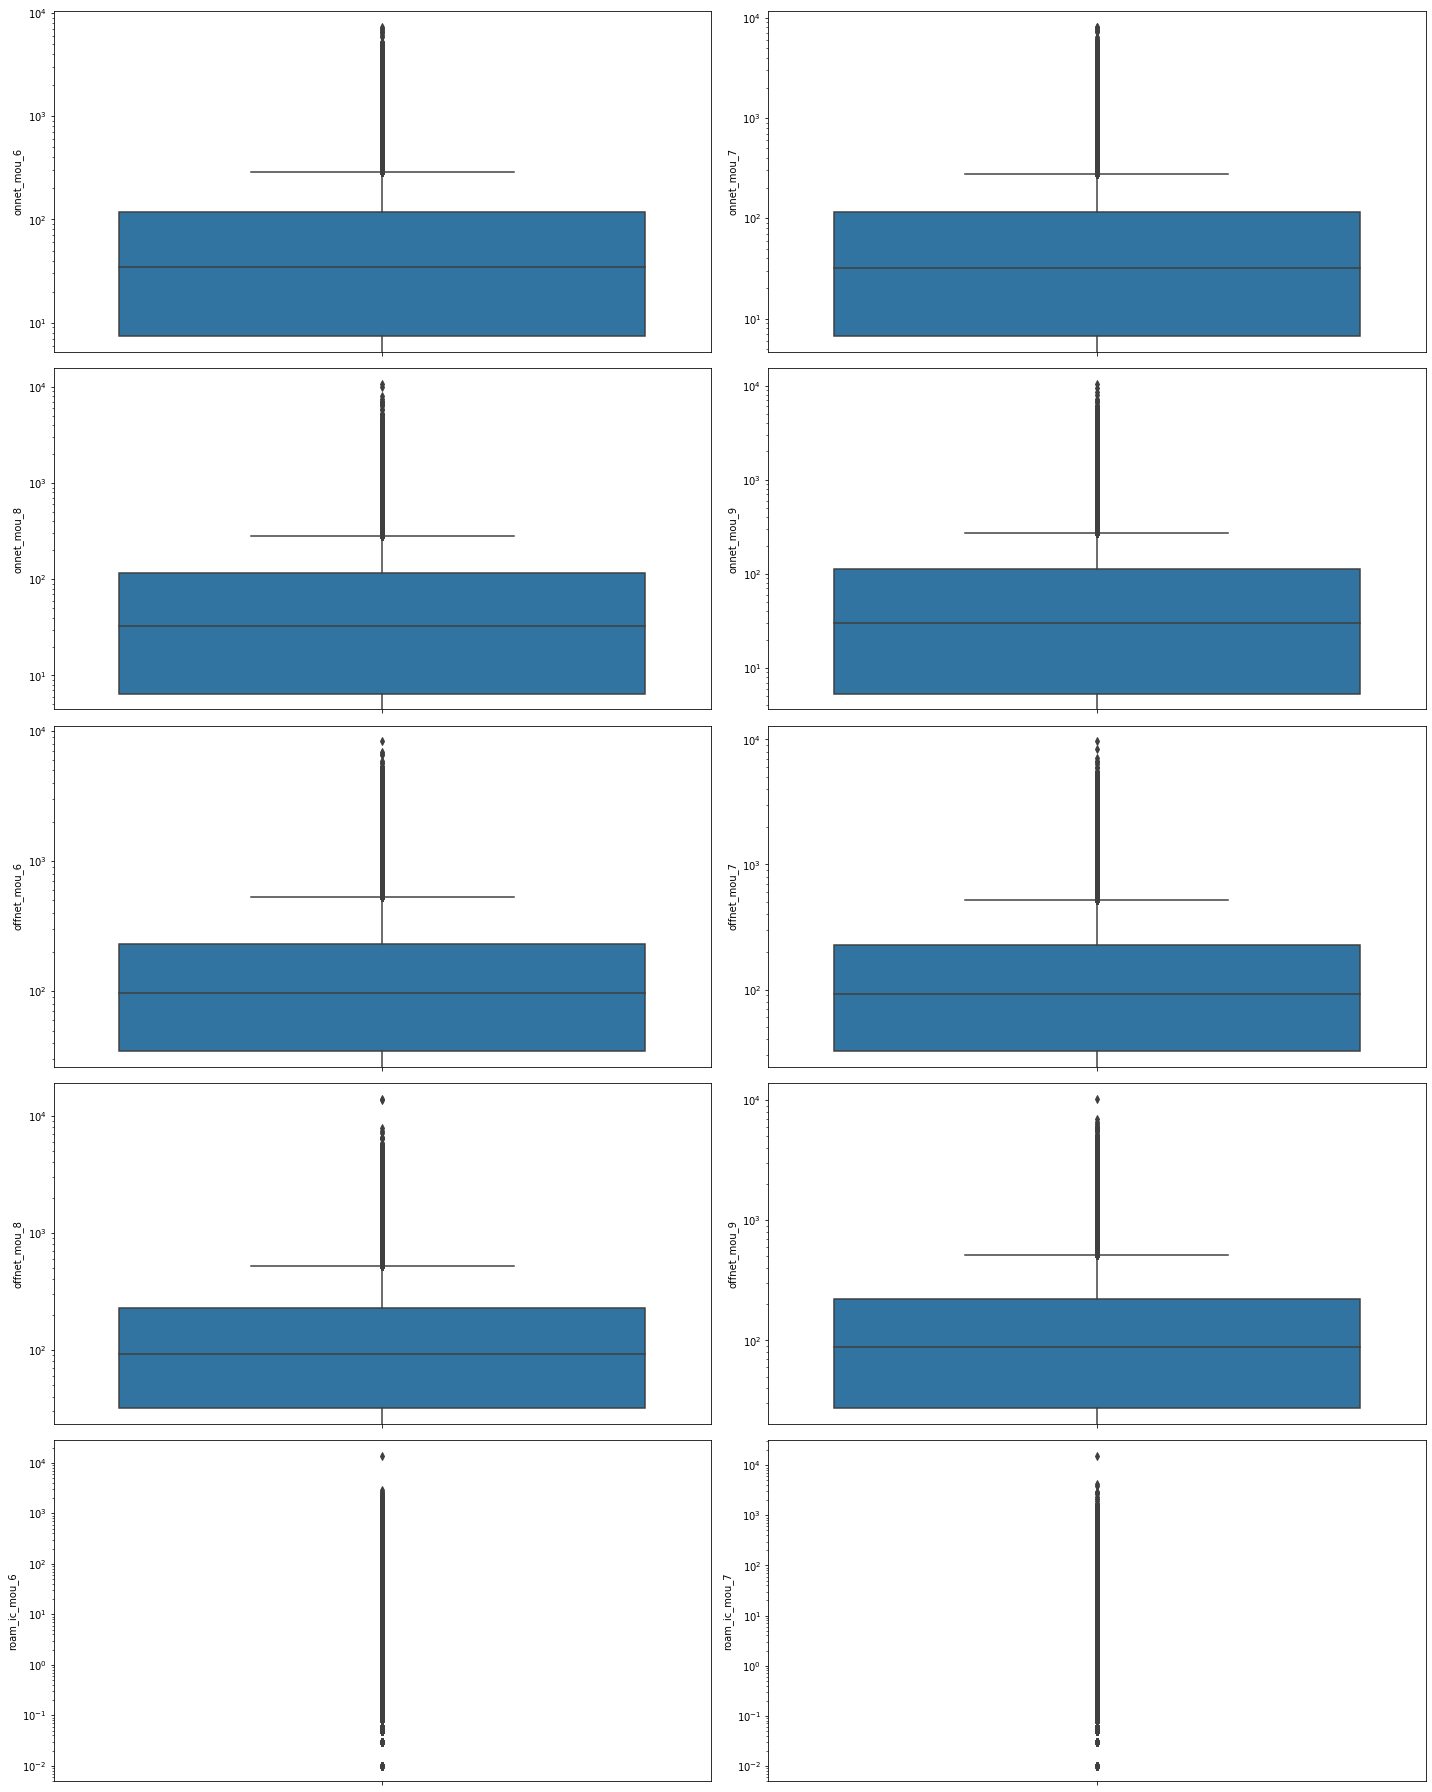

In [73]:
# Lets check the boxplot for some of the columns having outliers
plt.figure(figsize=(20,25))

for i in range(len(col_missing_val[:10])):
    
    plt.subplot(5, 2, i+1)
    sns.boxplot(y = col_missing_val[i], data = telecom)
    plt.yscale("log")

plt.tight_layout()
plt.show()

Will treat these outliers in upcoming steps

In [74]:
 # As percentage of missing values is less than around 8% lets impute it with 0.
telecom.fillna(0,inplace = True) 

# check if imputation done successfully
round(100*telecom.isnull().sum().sort_values(ascending=False)/len(telecom.index),2)

sep_vbc_3g            0.0
loc_ic_mou_9          0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
std_og_t2m_mou_8      0.0
std_og_t2m_mou_7      0.0
og_others_6           0.0
og_others_7           0.0
og_others_8           0.0
loc_ic_t2m_mou_7      0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
loc_ic_t2f_mou_9      0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_6      0.0
og_others_9           0.0
loc_ic_t2t_mou_9      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_m

## Filtering High - Value Customers

In [75]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

Add total data recharge and total recharge to get total combined recharge amount for a month

In [76]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom['amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6
telecom['amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_7

In [77]:
# calculate average recharge done by customer in June and July
telecom['av_amt_data_6_7'] = (telecom.amt_data_6 + telecom.amt_data_7)/2

# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: \033[1m{0}".format(telecom.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [78]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = telecom.loc[telecom.av_amt_data_6_7 >= telecom.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 182)

In [79]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(30001, 177)

We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

## Derive Churn
Tag the churned customers (churn=1, else 0) based on the fourth month on contion : Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase are marked as churn = 1 else 0

In [80]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [81]:
#check if any null values for churn column
churn_filtered.churn.isnull().any()

False

In [82]:
# check for data distribution for churn column
churn_filtered.churn.value_counts(normalize = True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

Looks like data is highly imbalanced

#### Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’)

In [83]:
#Dropping all attributes from 9th month for churn df and keeping them in seperate df for further use for final prediction
df_9 = churn_filtered[churn_filtered.columns[churn_filtered.columns.str.endswith('_9')]]
df_9['sep_vbc_3g'] = churn_filtered['sep_vbc_3g']

churn_df = churn_filtered[churn_filtered.columns[~churn_filtered.columns.str.endswith('_9')]]
churn_df.drop(['sep_vbc_3g'] , axis = 1 , inplace = True)

churn_df.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
3,514.453,597.753,637.760,102.41,1

In [84]:
churn_df.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

## Deriving New Features

In [85]:
# 1. Metric: age on network 
# Conversion of the number of months by 12
churn_df['aon_years']=churn_df['aon']/365
churn_df['aon_years'] = churn_df['aon_years'].astype(int)

# Lets drop 'aon' as no more require it
churn_df.drop(['aon'] , axis = 1 , inplace = True)

In [86]:
# 2. Metric:average rech amount for the Good phase amount(6 and 7) 
# first two months average 
churn_df['avg_tot_rech_2mths'] = (churn_df['total_rech_amt_6']+churn_df['total_rech_amt_7'])/2

In [87]:
# 3. Metric:diff between average rech amount for the Good phase (6 and 7) and action phase recharge amount(8)
# first two months average vs rech amount in action phase (month 8)
churn_df['avg_rech_amt_diff'] = (churn_df['avg_tot_rech_2mths']- churn_df['total_rech_amt_8'])

#### Similarly calculate difference between Action phase(8th Months) and Good phase (6 and 7th months) to understand the trend

In [88]:
# 4. 
# Calculate difference between 8th and previous months

# Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

churn_df['onnet_mou_diff'] = churn_df.onnet_mou_8 - ((churn_df.onnet_mou_6 + churn_df.onnet_mou_7)/2)

churn_df['offnet_mou_diff'] = churn_df.offnet_mou_8 - ((churn_df.offnet_mou_6 + churn_df.offnet_mou_7)/2)

churn_df['roam_ic_mou_diff'] = churn_df.roam_ic_mou_8 - ((churn_df.roam_ic_mou_6 + churn_df.roam_ic_mou_7)/2)

churn_df['roam_og_mou_diff'] = churn_df.roam_og_mou_8 - ((churn_df.roam_og_mou_6 + churn_df.roam_og_mou_7)/2)

churn_df['loc_og_mou_diff'] = churn_df.loc_og_mou_8 - ((churn_df.loc_og_mou_6 + churn_df.loc_og_mou_7)/2)

churn_df['std_og_mou_diff'] = churn_df.std_og_mou_8 - ((churn_df.std_og_mou_6 + churn_df.std_og_mou_7)/2)

churn_df['isd_og_mou_diff'] = churn_df.isd_og_mou_8 - ((churn_df.isd_og_mou_6 + churn_df.isd_og_mou_7)/2)

churn_df['spl_og_mou_diff'] = churn_df.spl_og_mou_8 - ((churn_df.spl_og_mou_6 + churn_df.spl_og_mou_7)/2)

churn_df['total_og_mou_diff'] = churn_df.total_og_mou_8 - ((churn_df.total_og_mou_6 + churn_df.total_og_mou_7)/2)

churn_df['loc_ic_mou_diff'] = churn_df.loc_ic_mou_8 - ((churn_df.loc_ic_mou_6 + churn_df.loc_ic_mou_7)/2)

churn_df['std_ic_mou_diff'] = churn_df.std_ic_mou_8 - ((churn_df.std_ic_mou_6 + churn_df.std_ic_mou_7)/2)

churn_df['isd_ic_mou_diff'] = churn_df.isd_ic_mou_8 - ((churn_df.isd_ic_mou_6 + churn_df.isd_ic_mou_7)/2)

churn_df['spl_ic_mou_diff'] = churn_df.spl_ic_mou_8 - ((churn_df.spl_ic_mou_6 + churn_df.spl_ic_mou_7)/2)

churn_df['total_ic_mou_diff'] = churn_df.total_ic_mou_8 - ((churn_df.total_ic_mou_6 + churn_df.total_ic_mou_7)/2)

churn_df['total_rech_num_diff'] = churn_df.total_rech_num_8 - ((churn_df.total_rech_num_6 + churn_df.total_rech_num_7)/2)

churn_df['total_rech_amt_diff'] = churn_df.total_rech_amt_8 - ((churn_df.total_rech_amt_6 + churn_df.total_rech_amt_7)/2)

churn_df['max_rech_amt_diff'] = churn_df.max_rech_amt_8 - ((churn_df.max_rech_amt_6 + churn_df.max_rech_amt_7)/2)

churn_df['total_rech_data_diff'] = churn_df.total_rech_data_8 - ((churn_df.total_rech_data_6 + churn_df.total_rech_data_7)/2)

churn_df['max_rech_data_diff'] = churn_df.max_rech_data_8 - ((churn_df.max_rech_data_6 + churn_df.max_rech_data_7)/2)

churn_df['av_rech_amt_data_diff'] = churn_df.av_rech_amt_data_8 - ((churn_df.av_rech_amt_data_6 + churn_df.av_rech_amt_data_7)/2)

churn_df['vol_2g_mb_diff'] = churn_df.vol_2g_mb_8 - ((churn_df.vol_2g_mb_6 + churn_df.vol_2g_mb_7)/2)

churn_df['vol_3g_mb_diff'] = churn_df.vol_3g_mb_8 - ((churn_df.vol_3g_mb_6 + churn_df.vol_3g_mb_7)/2)

In [89]:
churn_df.shape

(30001, 158)

## Data Visualisation

In [90]:
churn_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 158 columns):
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64

In [91]:
churn_df['churn'] = churn_df['churn'].astype('str')

In [92]:
# lets seggregate numerical and categorical columns
num_col = churn_df.select_dtypes(include =['int64', 'float64','int32']).columns

print("Numerical columns are :\n {0} ".format(num_col))

cat_col = churn_df.select_dtypes(include=['object']).columns

print("Categorical columns are :\n {0} ".format(cat_col))

Numerical columns are :
 Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=157) 
Categorical columns are :
 Index(['churn'], dtype='object') 


### Univariate analysis

#### Numerical features

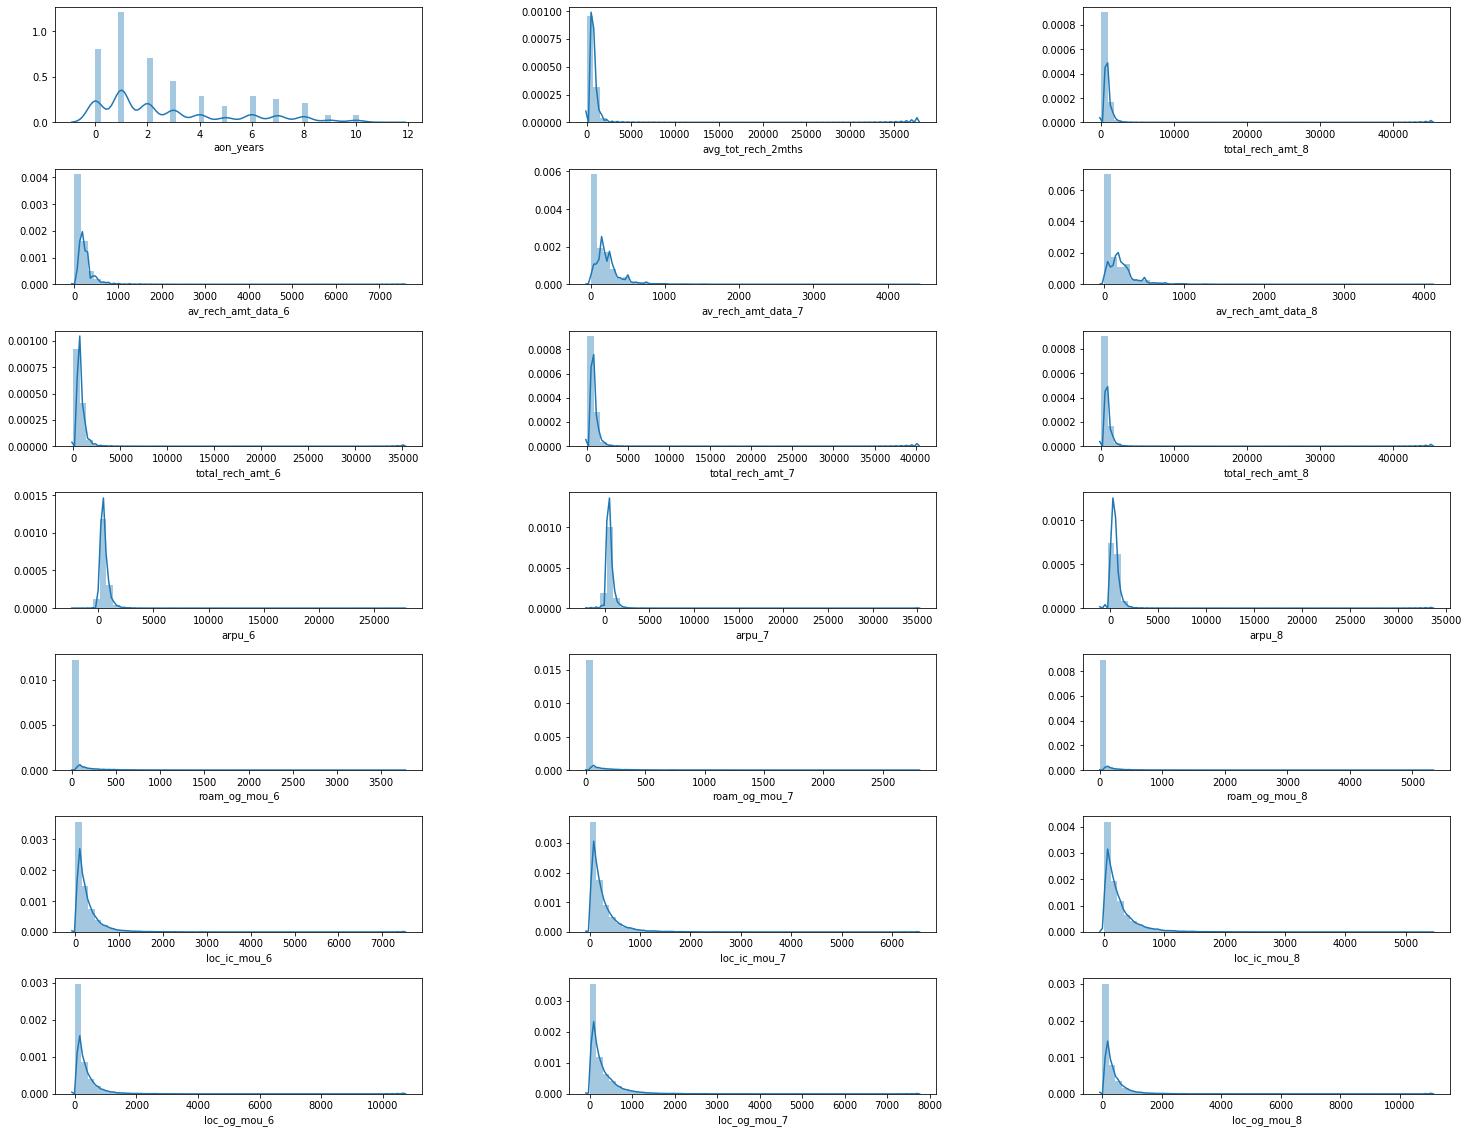

In [93]:
# below some selected features for univariate analysis for numerical features
cols = ['aon_years','avg_tot_rech_2mths','total_rech_amt_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','arpu_6','arpu_7','arpu_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']
plt.figure(figsize=(25,20))
plt.subplots_adjust(hspace = 0.4,wspace = 0.4)
for i,ele in enumerate(cols):
    plt.subplot(7, 3, i+1)
    sns.distplot(churn_df[ele])

1. If we see distribution of age of network, most of the users will fall under 0 to 2 years. whereas big chunk of user is under 1 yr bucket.
2. If we see the trend for data recharge amount from month 6 to 8,its clearly shows the downfall.
3. Same with the recharge amount, in 6th month its high, in 7th and 8th its falling down.

#### Categorical Features

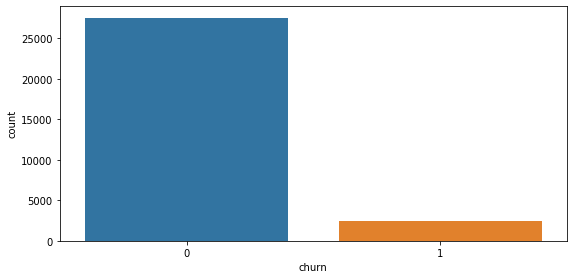

In [94]:
# we have only one categorical feature which we derived.
plt.figure(figsize=(20,25))
for i,ele in enumerate(cat_col[:9]):
    plt.subplot(5, 2, i+1)
    sns.countplot(churn_df[ele])

It seems churn results are highly imbalance. 

### Bivariate Analysis

#### Numerical columns

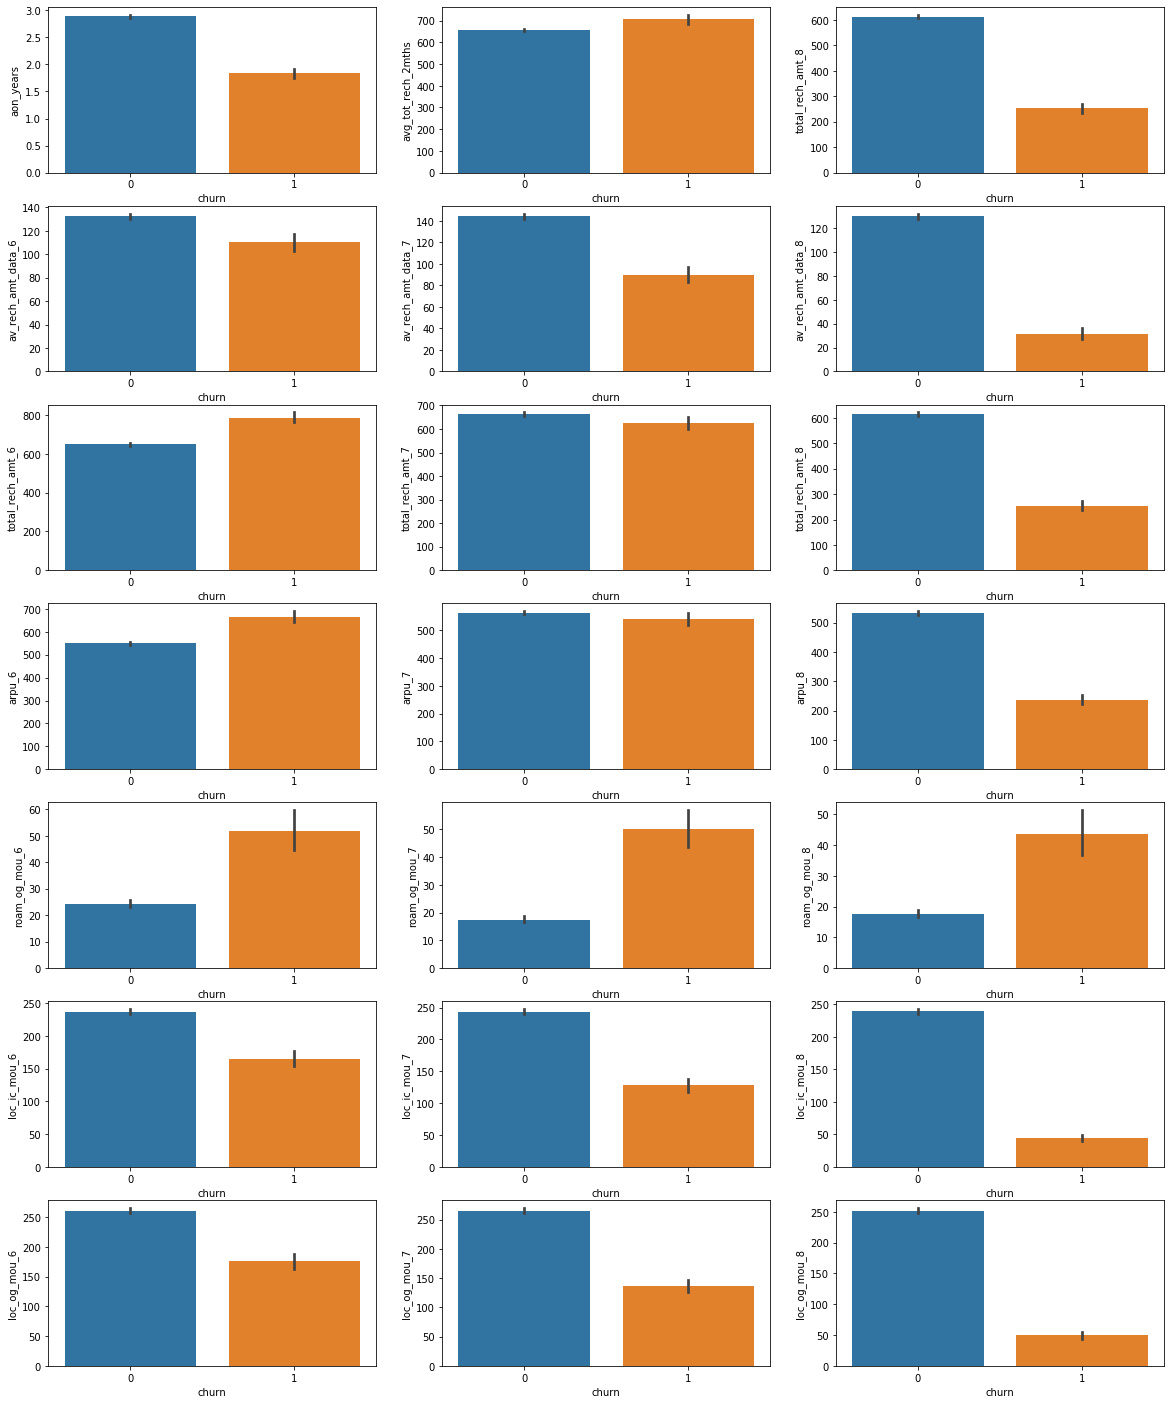

In [95]:
# Numerical cols vs Categorical (Churn)
plt.figure(figsize=(20,25))
for i,ele in enumerate(cols):
    plt.subplot(7, 3, i+1)
    sns.barplot(churn_df['churn'], churn_df[ele])

1. User who are churned belong to group where age of netwrok is below 2 yrs. So we can say that user with lass than 2 years of network age are highly likely to churn.<br>
2. Recharge amount or recharge data also we can see for user who have marked as churned, are falling down from month 6th to 8.<br>
3. Average reveneu per user in 8th month is below average compared to month 6 and 7.<br>
4. Average minutes of usage for 8th months has drastically descreased compared to good phase.

In [96]:
# correlation matrix
corr = churn_df.corr()
df_corr = corr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr[df_corr.level_0 != df_corr.level_1 ].head(10)

,level_0,level_1,0
409,arpu_8,total_rech_amt_8,0.955351
14917,total_rech_amt_8,arpu_8,0.955351
93,arpu_6,total_rech_amt_6,0.946125
14601,total_rech_amt_6,arpu_6,0.946125
14759,total_rech_amt_7,arpu_7,0.943588
251,arpu_7,total_rech_amt_7,0.943588
6951,isd_og_mou_8,isd_og_mou_7,0.943120
6795,isd_og_mou_7,isd_og_mou_8,0.943120
6638,isd_og_mou_6,isd_og_mou_8,0.918187
6950,isd_og_mou_8,isd_og_mou_6,0.918187


In [97]:
df_corr[df_corr.level_0 != df_corr.level_1].tail(10)

,level_0,level_1,0
21133,avg_rech_amt_diff,total_rech_amt_8,-0.553850
15049,total_rech_amt_8,avg_rech_amt_diff,-0.553850
21181,avg_rech_amt_diff,total_og_mou_diff,-0.584771
22585,total_og_mou_diff,avg_rech_amt_diff,-0.584771
12864,spl_ic_mou_6,spl_ic_mou_diff,-0.599969
23160,spl_ic_mou_diff,spl_ic_mou_6,-0.599969
13021,spl_ic_mou_7,spl_ic_mou_diff,-0.668119
23161,spl_ic_mou_diff,spl_ic_mou_7,-0.668119
21188,avg_rech_amt_diff,total_rech_amt_diff,-1.000000
23684,total_rech_amt_diff,avg_rech_amt_diff,-1.000000


There are lot of variable with high correlation value, indicating multicolinearity presence

## Outlier Treatment

In [98]:
churn_df.shape

(30001, 158)

In [99]:
# Removing outliers in all numeric variables 
for i in range(len(num_col)):
    Q1 = churn_df[num_col[i]].quantile(0.05)
    Q3 = churn_df[num_col[i]].quantile(0.95)
    IQR = Q3 - Q1
    churn_df_capped = churn_df[(churn_df[num_col[i]] >= Q1 - 1.5*IQR) & (churn_df[num_col[i]] <= Q3 + 1.5*IQR)]
    
churn_df_capped.shape

(29746, 158)

In [101]:
per_row_removed = round((100* (churn_df.shape[0]- churn_df_capped.shape[0])/churn_df.shape[0]),2)

print("Percentage of rows removed is : \033[1m{0} %".format(per_row_removed))

Percentage of rows removed is : 0.85 %


## Feature Selection

In [102]:
# Remove features with multi-collinearity

correlation_matrix = churn_df_capped.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.85)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

Total Number of correlated pairs:  26
[('arpu_6', 'total_rech_amt_6'), ('arpu_6', 'avg_tot_rech_2mths'), ('arpu_7', 'total_rech_amt_7'), ('arpu_7', 'avg_tot_rech_2mths'), ('arpu_8', 'total_rech_amt_8'), ('onnet_mou_6', 'std_og_t2t_mou_6'), ('onnet_mou_7', 'std_og_t2t_mou_7'), ('onnet_mou_8', 'std_og_t2t_mou_8'), ('offnet_mou_7', 'std_og_t2m_mou_7'), ('offnet_mou_8', 'std_og_t2m_mou_8'), ('std_og_mou_7', 'total_og_mou_7'), ('std_og_mou_8', 'total_og_mou_8'), ('isd_og_mou_6', 'isd_og_mou_7'), ('isd_og_mou_6', 'isd_og_mou_8'), ('isd_og_mou_7', 'isd_og_mou_8'), ('loc_ic_mou_6', 'total_ic_mou_6'), ('loc_ic_mou_7', 'total_ic_mou_7'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('total_rech_amt_6', 'avg_tot_rech_2mths'), ('total_rech_amt_7', 'avg_tot_rech_2mths'), ('total_rech_data_6', 'sachet_2g_6'), ('total_rech_data_7', 'sachet_2g_7'), ('total_rech_data_8', 'sachet_2g_8'), ('avg_rech_amt_diff', 'total_rech_amt_diff'), ('std_og_mou_diff', 'total_og_mou_diff'), ('loc_ic_mou_diff', 'total_ic_mou_diff

In [103]:
# column with more than 85% of correlation with each other
corr_matrix = churn_df_capped.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Columns to be dropped with high correlation are : \n {0}".format(to_drop))

Columns to be dropped with high correlation are : 
 ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'avg_tot_rech_2mths', 'total_og_mou_diff', 'total_ic_mou_diff', 'total_rech_amt_diff']


In [104]:
# Drop the columns identified above
churn_df_capped.drop(columns=to_drop, axis=1,inplace=True)

In [105]:
churn_df_capped.shape

(29746, 136)

In [106]:
churn_df_capped.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29746 entries, 0 to 30000
Data columns (total 136 columns):
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64

## Model Building

### Data Preparation

In [119]:
# convert to int
churn_df_capped['churn'] = churn_df_capped['churn'].astype('int')

In [120]:
churn_df_capped.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,aon_years,avg_rech_amt_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,1,2,55.0,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,5.440,0.000,0.000,0.000,-1.5,0.0,0.0,0.0,0.0,-9.975,-7.555
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.5,0.0,6.50,0.0,0.0,0.0,487.53,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,1,2,-2453.0,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-203.515,17.130,23.295,-0.105,2.0,395.0,0.0,0.0,0.0,0.000,0.000
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,0,0,0,0,0,21.03,910.65,122.16,0,0,399.0,-347.28

In [121]:
churn_df_capped.shape

(29746, 136)

### Train test split

In [122]:
# separte out dependent variable (define Y and X)
X = churn_df_capped[churn_df_capped.columns[~churn_df_capped.columns.isin(['churn'])]]
y = churn_df_capped['churn']

In [123]:
print(X.shape)
print('\n')
print(y.shape)

(29746, 135)


(29746,)


In [124]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,stratify = y,random_state=100)

In [125]:
# describes info about train and test set 
print("Number datapoints X_train dataset: ", X_train.shape) 
print("Number datapoints y_train dataset: ", y_train.shape) 
print("Number datapoints X_test dataset: ", X_test.shape) 
print("Number datapoints y_test dataset: ", y_test.shape)

Number datapoints X_train dataset:  (20822, 135)
Number datapoints y_train dataset:  (20822,)
Number datapoints X_test dataset:  (8924, 135)
Number datapoints y_test dataset:  (8924,)


### Dealing with Data Imbalance - SMOTE Analysis

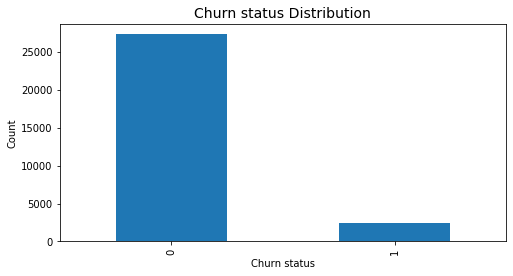

In [126]:
plt.figure(figsize=(8,4))
churn_df_capped['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)
plt.show()

In [127]:
# percentage distribution of churn
churn_df_capped['churn'].value_counts(normalize = True)

0    0.918678
1    0.081322
Name: churn, dtype: float64

In [128]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)) )
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 1693
Before OverSampling, counts of label '0': 19129 



In [129]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train ==1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: (38258, 135)
After OverSampling, the shape of train_y: (38258,) 

After OverSampling, counts of label '1': 19129
After OverSampling, counts of label '0': 19129


### Scaling the Data

In [130]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Getting all the numerical columns
num_cols = list(X_train.dtypes[X_train.dtypes != 'object'].index)

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,aon_years,avg_rech_amt_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,-0.739739,-0.723048,-0.210768,-0.587737,-0.470747,-0.349089,-0.735142,-0.633834,-0.436951,-0.211949,-0.195609,-0.192309,-0.229784,-0.259244,-0.224235,-0.343612,-0.293252,-0.080446,-0.570390,-0.521019,-0.247355,-0.281551,-0.246720,-0.010453,-0.283768,-0.233315,-0.209735,-0.593218,-0.528569,-0.205723,-0.488455,-0.145168,1.609573,-0.113999,-0.646348,-0.522005,-0.436054,-0.066613,-0.362998,-0.364214,-0.299337,-0.200224,-0.021181,-0.017643,-0.875624,-0.336658,-0.242807,0.022079,-0.586778,-0.504941,-0.349142,-0.311199,-0.291830,-0.245119,-0.613670,-0.514082,-0.265644,-0.197060,-0.177495,-0.163433,-0.323871,-0.263815,-0.218714,-0.130212,-0.124989,-0.094914,-0.353345,-0.304441,-0.258811,1.464093,2.132122,0.292449,-0.162668,-0.154334,-0.137257,0.137352,0.082200,0.893405,-0.900537,-1.031371,-0.418799,-0.034822,-0.007472,0.227641,0.112542,0.549415,-0.480965,0.131899,-0.210751,-0.019853,0.813494,0.860139,1.172991,1.155753,0.249573,0.517662,-0.235676,-0.132581,0.227112,1.286240,0.707360,1.710787,5.610054,2.540607,2.954180,-0.318371,-0.297796,-0.263134,-0.196743,-0.172183,-0.150011,2.790277,1.797876,0.873200,-0.917115,-0.612301,0.329806,0.435404,0.007321,0.028161,0.608859,0.323320,0.052867,0.118674,0.497120,0.158039,0.072389,-1.669473,0.698958,0.290060,0.032037,0.252361,-0.324672,0.462245,0.831705
1,-0.743200,-0.447649,0.128955,-0.514101,-0.544990,-0.427813,-0.282276,0.261285,0.476294,-0.211949,-0.195609,-0.192309,-0.229784,-0.259244,-0.224235,-0.162490,-0.280888,-0.258873,0.477758,1.775857,1.716527,-0.064706,0.420718,0.772594,0.608209,-0.233315,0.650909,0.207042,0.969646,0.965127,-0.488455,-0.145168,-0.132948,-0.113999,-0.646348,-0.608507,-0.442056,-0.066613,0.243080,-0.298479,0.059740,-0.093141,-0.021181,-0.017643,-0.504850,2.478367,-0.345707,-0.289709,-0.051419,1.346769,1.332602,-0.225257,-0.243531,-0.236295,1.145511,0.727476,0.755722,-0.197060,-0.177495,-0.163433,-0.239121,-0.263815,-0.218714,-0.130212,-0.124989,-0.094914,-0.297113,-0.304441,-0.258811,-0.43908

## Feature Elimination using PCA

In [131]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [132]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [133]:
pca.components_

array([[ 4.27000916e-03,  7.55355078e-02,  1.54915611e-01, ...,
         2.25847989e-02,  2.42128853e-02,  9.07210873e-03],
       [ 1.40269323e-01,  1.49577022e-01,  1.10595406e-01, ...,
         8.98023483e-02,  4.71799151e-02,  6.25369801e-02],
       [ 8.80573147e-02,  1.61129142e-01,  1.87724445e-01, ...,
         1.02003471e-01,  6.48740988e-02,  6.32332432e-02],
       ...,
       [-0.00000000e+00, -7.87277500e-17,  4.10151210e-16, ...,
         6.68344976e-02, -3.15918132e-02, -1.83472915e-01],
       [ 0.00000000e+00, -1.22574358e-16,  4.31607380e-17, ...,
        -2.41154163e-03,  1.44023788e-01,  3.14558709e-02],
       [-0.00000000e+00,  7.13405029e-17, -3.10783988e-17, ...,
        -2.78887016e-01,  1.32286269e-01, -1.81886461e-02]])

In [134]:
# lets check few components 
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.004270,0.140269,arpu_6
1,0.075536,0.149577,arpu_7
2,0.154916,0.110595,arpu_8
3,-0.064656,0.130753,onnet_mou_6
4,-0.027960,0.134248,onnet_mou_7


In [135]:
pca.explained_variance_ratio_

array([8.81557665e-02, 8.15678020e-02, 4.72344112e-02, 4.45071076e-02,
       3.72169888e-02, 3.54006737e-02, 2.77205973e-02, 2.57539767e-02,
       2.50707889e-02, 2.25763383e-02, 2.08604144e-02, 2.05601565e-02,
       1.98404518e-02, 1.96298913e-02, 1.88989464e-02, 1.83959520e-02,
       1.58956975e-02, 1.52445427e-02, 1.49449403e-02, 1.46198460e-02,
       1.40713327e-02, 1.33787314e-02, 1.32300710e-02, 1.30767269e-02,
       1.21643983e-02, 1.18808521e-02, 1.18112149e-02, 1.13478539e-02,
       1.12045461e-02, 1.07412876e-02, 1.02643188e-02, 1.01090288e-02,
       9.77020373e-03, 9.21630606e-03, 8.55223709e-03, 8.44440321e-03,
       8.06216309e-03, 7.84264897e-03, 7.46446407e-03, 6.89199719e-03,
       6.65248528e-03, 6.53728623e-03, 6.35922354e-03, 6.16243473e-03,
       6.01159687e-03, 5.90899921e-03, 5.85690153e-03, 5.61540019e-03,
       5.45699304e-03, 5.11832747e-03, 4.68854067e-03, 4.51494834e-03,
       4.39503425e-03, 4.11854874e-03, 4.07725002e-03, 3.95997227e-03,
      

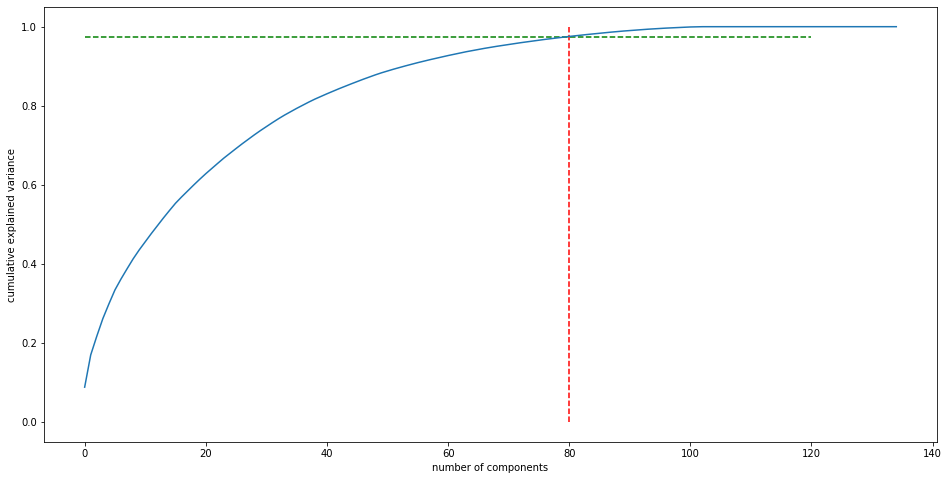

In [136]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.vlines(x=80, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.975, xmax=120, xmin=0, colors="g", linestyles="--")
plt.show()

As we can see  on number of component = 80 , variance explained at its best. And  97.5 % of variance is explained with  number of component = 80.<br> Hence will consider n_components as 80

In [137]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [138]:
df_train = pca_final.fit_transform(X_train)
df_train.shape


(38258, 80)

In [139]:
df_test = pca_final.transform(X_test)
df_test.shape

(8924, 80)

#### Converting arrays of PCA components into a Dataframe 

In [140]:
df_train_pca = pd.DataFrame(df_train, columns=['PC'+str(i) for i in range(1, df_train.shape[1]+1)],
                            index=X_train.index)
df_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80
0,2.388180,-4.541371,0.482008,-0.145281,-0.154726,-0.259644,1.220790,1.115572,-1.937051,-0.949961,1.512376,2.659102,-1.030205,-0.525501,-0.018562,-0.788348,0.583705,-0.313247,0.672677,0.263479,-0.068056,1.451749,-2.893284,-1.347908,2.813591,-0.058727,-1.062099,-0.085467,2.535238,0.197404,-1.493802,-0.403192,2.063234,-0.702645,0.202106,-1.287913,-0.170114,-0.510726,-0.161773,0.037078,-0.527575,-0.532763,0.440791,-0.125094,0.692356,0.199541,0.719514,-0.874029,0.276831,0.482692,0.198501,0.501486,1.045890,-0.515415,0.931959,0.016608,1.443233,0.102766,-0.062506,0.128927,-0.576452,-0.730161,0.324779,0.565459,0.083476,0.094713,-0.250383,0.087316,-0.300542,0.519460,-0.037277,-1.401359,0.308483,0.494530,0.536496,0.347098,-0.056411,0.133656,-0.419897,0.129439
1,7.861969,-2.373931,0.700449,1.077307,-2.285010,0.315858,3.224348,1.822486,-1.301961,-1.937592,-0.088050,1.188869,-0.860709,-0.827701,0.435048,1.056022,0.415290,-0.468832,0.025848,-0.222736,-0.115388,-1.072627,-0.891175,0.398871,2.080306,0.760047,-1.052794,0.351478,2.030443,-0.212763,-2.788869,-0.521665,0.544921,-0.533280,-0.045539,0.209868,-0.454428,-0.547736,1.694851,-0.241713,-0.947008,0.313313,0.776691,-0.447564,1.879632,-0.181727,0.113688,-0.634608,0.479268,0.193746,0.109524,0.589260,0.516656,-0.351240,0.343138,0.263885,0.807824,-0.692994,0.408116,-0.033182,0.042182,0.157518,0.045786,0.156153,0.308981,-0.280699,0.149518,0.967579,0.811794,-0.783025,-1.483540,0.325371,1.407967,-0.219681,-0.132172,0.694895,-0.060173,0.163183,-0.276827,0.167306
2,-3.105733,-0.185063,0.075239,-0.494207,-0.054864,-0.586246,0.255885,1.142822,-0.751099,0.246878,-0.363739,-0.546687,0.693797,-0.095569,-0.594150,-0.428024,0.260727,-0.383360,-0.186368,0.347586,-0.143830,0.325884,-0.315520,0.567960,-0.016409,0.208055,0.932696,0.152092,0.034180,-0.100968,-0.313774,0.046967,0.151432,0.246778,-0.156241,0.910772,0.286068,-0.645900,0.234319,0.151191,-0.025596,0.227616,0.687329,-0.196433,-0.101490,0.016956,-0.399597,-0.861218,-0.431892,-0.398309,0.048707,0.165593,-0.070658,0.223502,0.144614,0.214274,0.059036,-0.002238,0.184757,0.007912,-0.099456,0.184962,-0.120735,0.008454,0.202426,-0.579715,-0.147545,-0.511535,-0.410011,-0.302513,-0.023543,-0.285452,-0.056331,0.147647,-0.142989,-0.031407,0.091333,-0.014549,-0.049732,-0.454551
3,6.340817,5.552584,-0.536125,-1.965927,4.372678,-2.012082,2.376542,-2.437757,-1.467678,4.230302,-0.631785,0.381254,2.239601,1.855762,-0.830312,-0.852883,2.361885,1.399263,-2.657088,-0.598850,-0.637412,1.620223,0.696700,-0.619653,2.116184,2.083224,1.318244,-0.510796,1.340875,-2.106899,1.521223,-0.006525,1.615472,-1.258454,-0.741344,1.387352,0.363015,2.449780,0.515945,0.461275,-1.204838,0.335168,0.784471,-1.523728,0.266074,-1.901892,0.118078,-0.234694,0.334606,-0.384157,0.199125,0.546124,-0.562040,-1.398436,-0.081510,-0.052883,-1.149915,-0.438673,2.201289,-1.702181,0.613972,-0.171042,-0.311591,0.547697,-0.240854,-0.843421,0.136878,2.645759,2.379831,1.835592,0.531433,-0.434037,-1.862442,-1.661976,2.331228,1.437234,1.269232,0.457926,-1.040976,0.349224
4,6.009603,5.884369,-6.132295,-1.856136,1.599497,0.619765,2.814558,-1.895772,1.338541,-2.935999,-1.822032,-1.517264,-0.563935,-1.790489,1.940237,0.371331,0.403894,-2.364406,1.603936,-1.198262,-3.940114,-1.392784,-3.392714,2.486335,-1.461457,0.558282,1.881417,-0.292121,-1.706981,0.567555,-0.894707,0.122466,-0.616687,-1.091941,3.257879,0.545323,-0.604294,2.829088,0.285780,0.177113,-1.668895,-2.648853,-0.003516,0.701675,-1.367446,-0.144893,-0.741411,1.192927,0.325246,0.107749,0.358143,0.266066,-0.310744,0.027197,0.075732,-0.019412,-0.344109,0.163704,0.364582,0.04

In [141]:
df_test_pca = pd.DataFrame(df_test, columns=['PC'+str(i) for i in range(1, df_test.shape[1]+1)],
                            index=X_test.index)
df_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80
10922,-738.202514,2422.962418,1871.934419,1448.258862,-1482.932723,151.939408,-654.014907,31.727861,-674.119894,101.084145,327.795030,518.914448,888.105149,-250.215173,-359.150220,-1390.777789,-30.151621,-370.550779,412.450265,-254.449364,-410.852963,79.403099,-495.986263,746.087865,-105.371130,495.232567,316.029877,-312.777605,-631.365622,-96.669308,-240.785449,63.260146,-129.453807,-60.490013,-199.448140,12.653967,-798.549421,339.649198,331.402590,-22.730400,-116.265928,48.797990,-50.673792,154.969345,168.509546,201.228210,487.237238,-10.013220,263.138119,329.884786,-40.990043,-226.056935,123.820589,-52.221882,-38.317191,51.155369,-49.473254,-81.778714,33.295762,-175.234108,116.902043,-30.931543,-20.391859,1.945212,-127.706447,180.958832,16.359388,-109.121152,-97.645183,175.505714,164.864985,135.594822,100.814376,-125.659863,28.214233,-130.161895,-20.417339,53.918290,113.014191,187.567067
25621,461.752509,237.572339,7.630325,267.772748,-154.738606,174.888275,82.370551,-46.987109,191.437436,-48.244039,240.557038,785.362343,-333.115019,207.796603,-0.965201,-160.741818,-157.221051,-136.051446,258.513153,-87.519749,28.217709,58.147173,309.733020,-2.347353,-200.117200,-5.127773,126.252540,-54.837568,-410.130466,-105.963063,355.848958,78.121520,-91.536723,-3.746616,11.876539,7.975349,-149.707673,41.534069,99.001922,-10.872504,-27.886326,156.909310,-264.834653,-34.084809,-109.299800,-151.721143,-279.108460,-54.526088,-133.835298,3.138368,26.239554,19.662826,18.859690,-9.568576,109.948545,112.874791,-189.589696,62.955895,-55.998540,-51.706498,-34.441176,37.353539,34.855452,-49.404677,177.594687,13.354986,5.254232,-26.642116,63.995498,67.257799,2.898605,-11.380473,-10.879260,-1.579391,4.082175,-70.408578,16.305559,-79.314197,15.008357,2.857793
914,-410.317634,1773.846812,1275.767726,1236.321243,-1241.325857,202.252841,75.615763,280.620439,-350.182178,165.970870,236.541213,626.820891,268.574428,-32.675012,-321.597756,-887.560192,-260.660617,-71.800903,506.035233,373.221159,-159.978165,195.292525,-615.451351,443.666804,161.669191,-122.261805,364.440630,-104.364800,-559.356267,-328.300199,960.502714,329.240582,-418.764262,-34.217003,185.968622,626.074893,-1010.848683,-111.307802,446.258646,-14.224148,-43.154637,136.208930,-147.984446,-98.013260,-84.214992,195.654122,74.111549,-104.084721,-152.073445,305.082493,221.045375,0.181096,495.432405,-43.082292,55.067542,309.528883,-15.504430,-166.589547,14.588665,-212.200111,-260.737121,-125.702516,94.312610,148.673411,273.956682,-353.337525,-46.511183,-113.500300,70.098938,-24.991386,85.916559,7.575041,-116.128882,37.668550,77.722510,-130.802523,89.217651,-31.601861,77.918111,-55.048862
12628,783.544027,816.017092,-143.763718,290.354348,-367.298616,275.401918,130.038317,-350.967448,371.565610,-137.624005,161.128368,732.590936,-574.352470,205.244268,116.024651,-73.455006,-101.932608,-312.166516,313.805847,-343.341211,157.501090,-281.936360,242.590659,96.243204,-88.193877,-41.686975,125.535957,-77.243035,-349.042339,-127.741387,390.875891,59.676005,-245.066060,-56.486503,-171.954143,-307.924359,-213.136866,217.953520,-8.429544,-52.640338,-212.716146,129.077578,-411.501751,36.339942,129.725125,-271.521096,-255.178582,125.355976,-134.658967,170.901225,6.502127,-47.676915,-33.276695,-239.638423,48.511173,-56.939199,-204.252782,-73.737413,-81.960377,-65.327620,-93.760106,203.482870,-2.648307,-31.889961,246.709780,-231.577812,-2.561561,92.739111,-1.842602,-14.450245,-0.975026,-185.072335,-20.466525,-44.252147,-31.781818,-66.813784,141.651032,-185.111232,-21.675453,-197.869584
9498,1035.239979,575.883802,184.303257,30

## Model Building using PCA Components

In [142]:
#Let's first form a function to get all evaluation metrics at one time

from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve

def metrics_dataframe(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    specificity = TN/float(TN+FP)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    false_positive_rate = FP/float(TN+FP)
    positive_predictive_value = TP/float(TP+FP)
    negative_predictive_value = TN/float(TN+ FN)
    
    return_data = {'Metric': ['Specificity', 'Accuracy', 'Precision', 'Sensitivity/Recall', 'False Positive Rate',
                             'Positive Predictive Value', 'Negative Predictive Value'],
                   'Score': [specificity, accuracy, precision, recall, false_positive_rate, positive_predictive_value,
                            negative_predictive_value]}
    return pd.DataFrame.from_dict(return_data)

Our goal of the analysis is to predict the churn customers. Inorder to predict churns, **`Recall`** is the best evaluation metric for identifying the churners. Let's build the model having maximum Recall.

## Model 1 : Logistic Regression using sklearn

In [147]:
# Importing model libraries
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 100)

# Fitting the model
lm.fit(df_train_pca, y_train)

#Predicting on the test set
y_pred_log = lm.predict(df_test_pca)

#Evaluating all the metrics
print(classification_report(y_test, y_pred_log))
metrics_dataframe(y_test, y_pred_log)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      8198
           1       0.18      0.88      0.30       726

    accuracy                           0.67      8924
   macro avg       0.58      0.77      0.55      8924
weighted avg       0.92      0.67      0.75      8924



,Metric,Score
0,Specificity,0.655038
1,Accuracy,0.673129
2,Precision,0.183838
3,Sensitivity/Recall,0.877410
4,False Positive Rate,0.344962
5,Positive Predictive Value,0.183838
6,Negative Predictive Value,0.983697


Let's check with other models if we can get high scores

## Model 2 : Decision Tree 

In [148]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree
dt_default = DecisionTreeClassifier(max_depth=5, random_state=100)
dt_default.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [149]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_dtree = dt_default.predict(df_test_pca)

# Printing classification report and all metrics
print(classification_report(y_test, y_pred_dtree))
metrics_dataframe(y_test, y_pred_dtree)

              precision    recall  f1-score   support

           0       0.89      0.41      0.56      8198
           1       0.06      0.43      0.11       726

    accuracy                           0.41      8924
   macro avg       0.48      0.42      0.34      8924
weighted avg       0.82      0.41      0.53      8924



,Metric,Score
0,Specificity,0.412296
1,Accuracy,0.414052
2,Precision,0.061368
3,Sensitivity/Recall,0.433884
4,False Positive Rate,0.587704
5,Positive Predictive Value,0.061368
6,Negative Predictive Value,0.891585


#### Grid Search to Find Optimal Hyperparameters

Tuning the model on the hyperparameters

In [150]:
# GridSearchCV to find optimal hyperparameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds
n_folds = 5

# Create the parameter grid 
param_grid = {
                'max_depth': range(5, 15, 5),
                'min_samples_leaf': range(50, 150, 50),
                'min_samples_split': range(50, 150, 50),
                'criterion': ["entropy", "gini"]          }


# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=100)
grid_search_dtree = GridSearchCV(estimator = dtree, param_grid = param_grid, return_train_score=True,
                                      cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search_dtree.fit(df_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  9.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                    

In [151]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_dtree.best_score_,'using',grid_search_dtree.best_estimator_)

We can get accuracy of 0.8484765545921483 using DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')


**Running the model with best parameters obtained from grid search**

In [152]:
# model with optimal hyperparameters
dtree_opt = DecisionTreeClassifier(criterion = "gini",
                                  class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dtree_opt.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [154]:
#Predicting and evaluating metrics on the test set
y_pred_dtree_hyp = dtree_opt.predict(df_test_pca)

print(classification_report(y_test, y_pred_dtree_hyp))
metrics_dataframe(y_test, y_pred_dtree_hyp)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      8198
           1       0.15      0.58      0.24       726

    accuracy                           0.70      8924
   macro avg       0.55      0.65      0.53      8924
weighted avg       0.89      0.70      0.77      8924



,Metric,Score
0,Specificity,0.715418
1,Accuracy,0.704169
2,Precision,0.152253
3,Sensitivity/Recall,0.577135
4,False Positive Rate,0.284582
5,Positive Predictive Value,0.152253
6,Negative Predictive Value,0.950259


Tuning the hyperparameters of the Decision tree has not helped to find the best metrics. Let's try some Boosting techniques

## Model 3: Gradient Boosting

In [155]:
# gradient boost 
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=100)

GBC.fit(df_train_pca,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [156]:
#Predicting and evaluating metrics on the test set
y_pred_grad = GBC.predict(df_test_pca)

print(classification_report(y_test, y_pred_grad))
metrics_dataframe(y_test, y_pred_grad)

              precision    recall  f1-score   support

           0       0.94      0.69      0.79      8198
           1       0.12      0.50      0.20       726

    accuracy                           0.67      8924
   macro avg       0.53      0.59      0.50      8924
weighted avg       0.87      0.67      0.75      8924



,Metric,Score
0,Specificity,0.687485
1,Accuracy,0.672344
2,Precision,0.124402
3,Sensitivity/Recall,0.501377
4,False Positive Rate,0.312515
5,Positive Predictive Value,0.124402
6,Negative Predictive Value,0.939647


#### Tuning the model on learning rate and subsample parameters

In [157]:
# parameter grid
param_grid_grad = {"learning_rate": [0.001,0.1,0.2, 0.6],
              "subsample": [0.3, 0.6, 0.9]
             }

In [158]:
# run grid search
folds = 3

GBC_hyp = GradientBoostingClassifier(random_state=100)

grid_search_GBC = GridSearchCV(GBC_hyp, 
                               cv = folds,
                               param_grid=param_grid_grad, 
                               scoring = 'recall', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(df_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 63.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [159]:
grid_search_GBC.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

#### Building the model on optimal hyperparameters

In [160]:
GBC_opt = GradientBoostingClassifier(learning_rate=0.6,subsample=0.9, random_state=100)

GBC_opt.fit(df_train_pca,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.6, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [162]:
#Predicting and evaluating metrics on the test set
y_pred_grad_opt = GBC_opt.predict(df_test_pca)

print(classification_report(y_test, y_pred_grad_opt))
metrics_dataframe(y_test, y_pred_grad_opt)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8198
           1       0.05      0.02      0.03       726

    accuracy                           0.90      8924
   macro avg       0.49      0.50      0.49      8924
weighted avg       0.85      0.90      0.87      8924



,Metric,Score
0,Specificity,0.974384
1,Accuracy,0.896459
2,Precision,0.054054
3,Sensitivity/Recall,0.016529
4,False Positive Rate,0.025616
5,Positive Predictive Value,0.054054
6,Negative Predictive Value,0.917950


In [164]:
# evaluate predictions

roc = roc_auc_score(y_test, y_pred_grad_opt)
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 49.55%


Gradient Boosting has still not performed well. Now will try the XGBoosting technique

## XGBoost

In [165]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

In [166]:
# fit model on training data with default hyperparameters
xgb = XGBClassifier(random_state=100)
xgb.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [167]:
#Predicting and evaluating metrics on the test set
y_pred_xgb = xgb.predict(df_test_pca)

print(classification_report(y_test, y_pred_xgb))
metrics_dataframe(y_test, y_pred_xgb)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      8198
           1       0.18      0.42      0.25       726

    accuracy                           0.80      8924
   macro avg       0.56      0.62      0.57      8924
weighted avg       0.88      0.80      0.83      8924



,Metric,Score
0,Specificity,0.830324
1,Accuracy,0.796728
2,Precision,0.178867
3,Sensitivity/Recall,0.417355
4,False Positive Rate,0.169676
5,Positive Predictive Value,0.178867
6,Negative Predictive Value,0.941494


In [169]:
# calculating roc_auc score
roc = roc_auc_score(y_test, y_pred_xgb)

print("AUC: %.2f%%" % (roc * 100.0))

AUC: 62.38%


#### Tuning the model with the hyperparameters

In [170]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid_xgb = {"learning_rate": [0.001,0.1,0.2, 0.6],
              "subsample": [0.3, 0.6, 0.9]
             }

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=300, random_state=100)

# set up GridSearchCV()
xgb_hyp = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid_xgb, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [171]:
#fit the model
xgb_hyp.fit(df_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 13.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=300, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.1, 0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre

In [172]:
xgb_hyp.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [173]:
# chosen hyperparameters
params_xgb_hyp = {'learning_rate': 0.6,'subsample':0.9}

# fit model on training data
model_xgb_opt = XGBClassifier(params = params_xgb_hyp,random_state=100)
model_xgb_opt.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'subsample': 0.9}, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [174]:
#Predicting and evaluating metrics on the test set
y_pred_xgb_opt = model_xgb_opt.predict(df_test_pca)

print(classification_report(y_test, y_pred_xgb_opt))
metrics_dataframe(y_test, y_pred_xgb_opt)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      8198
           1       0.18      0.42      0.25       726

    accuracy                           0.80      8924
   macro avg       0.56      0.62      0.57      8924
weighted avg       0.88      0.80      0.83      8924



,Metric,Score
0,Specificity,0.830324
1,Accuracy,0.796728
2,Precision,0.178867
3,Sensitivity/Recall,0.417355
4,False Positive Rate,0.169676
5,Positive Predictive Value,0.178867
6,Negative Predictive Value,0.941494


In [175]:
# roc_auc
auc = roc_auc_score(y_test, y_pred_xgb_opt)
auc

0.6238399206418014

1. We are going with Recall as the evaluation Metric as we need to focus on number of correct predictions of churn over total actual churned .<br> 
2. From above 4 models, we got best score from logistic regression model which shows Recall as **`87%`**. <br>
Lets see if we can still improve the score by building Logistic regression model using statsmodels 

## Model 5: Logistic Regression using statsmodels

In [229]:
#Defining the model building codes into a single function to avoid space complexity

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_linear_regression_model(y_train, X_train):
    X_train = sm.add_constant(X_train)
    return X_train, sm.GLM(y_train, X_train, family = sm.families.Binomial(),random_state=100).fit()

def get_vif(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

def get_model_and_print_summary(X_df):
    X_train, lm = get_linear_regression_model(y_train, X_df)
    print(lm.summary())
    print('\n\nVIF Values\n')
    print(get_vif(X_df))
    print('\n\nP-Values\n')
    print(lm.pvalues.sort_values(ascending=False))
    return X_train, lm    

In [230]:
df_train1, sm1 = get_model_and_print_summary(df_train_pca)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38177
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13502.
Date:                Sun, 15 Mar 2020   Deviance:                       27004.
Time:                        20:33:47   Pearson chi2:                 2.38e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5765      0.021    -26.857      0.0

Dropping the `PC77` feature having insignificant p-value

In [231]:
df_train2, sm2 = get_model_and_print_summary(df_train1.drop('PC77',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38178
Model Family:                Binomial   Df Model:                           79
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13502.
Date:                Sun, 15 Mar 2020   Deviance:                       27004.
Time:                        20:34:30   Pearson chi2:                 2.41e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5770      0.021    -26.907      0.0

Let's drop every feature one-by-one haivng p-values greater than `0.05`

In [232]:
df_train3, sm3 = get_model_and_print_summary(df_train2.drop('PC68',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38179
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13502.
Date:                Sun, 15 Mar 2020   Deviance:                       27005.
Time:                        20:34:54   Pearson chi2:                 2.44e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5764      0.021    -26.888      0.0

In [233]:
df_train4, sm4 = get_model_and_print_summary(df_train3.drop('PC34',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38180
Model Family:                Binomial   Df Model:                           77
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13503.
Date:                Sun, 15 Mar 2020   Deviance:                       27006.
Time:                        20:35:18   Pearson chi2:                 3.81e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5777      0.021    -26.927      0.0

In [234]:
df_train5, sm5 = get_model_and_print_summary(df_train4.drop('PC47',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38181
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13507.
Date:                Sun, 15 Mar 2020   Deviance:                       27013.
Time:                        20:35:44   Pearson chi2:                 4.53e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5739      0.021    -27.108      0.0

In [235]:
df_train6, sm6 = get_model_and_print_summary(df_train5.drop('PC40',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38182
Model Family:                Binomial   Df Model:                           75
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13507.
Date:                Sun, 15 Mar 2020   Deviance:                       27014.
Time:                        20:36:08   Pearson chi2:                 4.22e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5729      0.021    -27.120      0.0

In [236]:
df_train7, sm7 = get_model_and_print_summary(df_train6.drop('PC30',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38183
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13510.
Date:                Sun, 15 Mar 2020   Deviance:                       27019.
Time:                        20:36:33   Pearson chi2:                 4.88e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5741      0.021    -27.036      0.0

In [237]:
df_train8, sm8 = get_model_and_print_summary(df_train7.drop('PC65',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38184
Model Family:                Binomial   Df Model:                           73
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13510.
Date:                Sun, 15 Mar 2020   Deviance:                       27019.
Time:                        20:36:54   Pearson chi2:                 4.84e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5748      0.021    -27.187      0.0

In [238]:
df_train9, sm9 = get_model_and_print_summary(df_train8.drop('PC78',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38185
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13510.
Date:                Sun, 15 Mar 2020   Deviance:                       27020.
Time:                        20:37:15   Pearson chi2:                 4.85e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5748      0.021    -27.187      0.0

In [239]:
df_train10, sm10 = get_model_and_print_summary(df_train9.drop('PC36',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38186
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13511.
Date:                Sun, 15 Mar 2020   Deviance:                       27021.
Time:                        20:37:37   Pearson chi2:                 7.14e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5780      0.021    -27.399      0.0

In [240]:
df_train11, sm11 = get_model_and_print_summary(df_train10.drop('PC17',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38187
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13512.
Date:                Sun, 15 Mar 2020   Deviance:                       27024.
Time:                        20:38:02   Pearson chi2:                 6.04e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5783      0.021    -27.416      0.0

In [241]:
df_train12, sm12 = get_model_and_print_summary(df_train11.drop('PC61',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38188
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13512.
Date:                Sun, 15 Mar 2020   Deviance:                       27024.
Time:                        20:38:25   Pearson chi2:                 5.98e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5775      0.021    -27.782      0.0

In [242]:
df_train13, sm13 = get_model_and_print_summary(df_train12.drop('PC71',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38189
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13514.
Date:                Sun, 15 Mar 2020   Deviance:                       27027.
Time:                        20:38:43   Pearson chi2:                 5.35e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5759      0.021    -27.743      0.0

In [243]:
df_train14, sm14 = get_model_and_print_summary(df_train13.drop('PC39',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38190
Model Family:                Binomial   Df Model:                           67
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13514.
Date:                Sun, 15 Mar 2020   Deviance:                       27027.
Time:                        20:39:01   Pearson chi2:                 5.33e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5771      0.021    -27.909      0.0

In [244]:
df_train15, sm15 = get_model_and_print_summary(df_train14.drop('PC55',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38191
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13515.
Date:                Sun, 15 Mar 2020   Deviance:                       27030.
Time:                        20:39:18   Pearson chi2:                 6.60e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5775      0.021    -27.893      0.0

In [245]:
df_train16, sm16 = get_model_and_print_summary(df_train15.drop('PC37',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38192
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13515.
Date:                Sun, 15 Mar 2020   Deviance:                       27030.
Time:                        20:39:35   Pearson chi2:                 6.99e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5780      0.021    -27.980      0.0

In [246]:
df_train17, sm17 = get_model_and_print_summary(df_train16.drop('PC25',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38193
Model Family:                Binomial   Df Model:                           64
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13521.
Date:                Sun, 15 Mar 2020   Deviance:                       27042.
Time:                        20:39:51   Pearson chi2:                 6.35e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5761      0.021    -27.998      0.0

In [247]:
df_train18, sm18 = get_model_and_print_summary(df_train17.drop('PC45',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38194
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13535.
Date:                Sun, 15 Mar 2020   Deviance:                       27070.
Time:                        20:40:09   Pearson chi2:                 3.94e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5827      0.021    -28.310      0.0

In [248]:
df_train19, sm19 = get_model_and_print_summary(df_train18.drop('PC79',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38195
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13542.
Date:                Sun, 15 Mar 2020   Deviance:                       27085.
Time:                        20:40:26   Pearson chi2:                 3.95e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5838      0.021    -28.352      0.0

In [249]:
df_train20, sm20 = get_model_and_print_summary(df_train19.drop('PC69',axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38258
Model:                            GLM   Df Residuals:                    38196
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13543.
Date:                Sun, 15 Mar 2020   Deviance:                       27085.
Time:                        20:40:41   Pearson chi2:                 4.01e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5840      0.021    -28.362      0.0

Now all the p-values and VIFs are significant. Let's finalise this model 

In [250]:
#Assigning the variable for final model
df_train_final = df_train20
sm_final = sm20

In [251]:
#Predicting the probabilities
y_pred_log_sm = pd.DataFrame({'converted':y_train,'converted_probability':sm_final.predict(df_train_final)})
y_pred_log_sm.head()

,converted,converted_probability
0,0,0.002979
1,0,0.000196
2,0,0.780229
3,0,0.105504
4,0,0.001221


#### ROC Curve

In [252]:
#Defining the function for plotting the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [253]:
fpr, tpr, thresholds = roc_curve(y_pred_log_sm.converted,
                                         y_pred_log_sm.converted_probability, drop_intermediate=False )

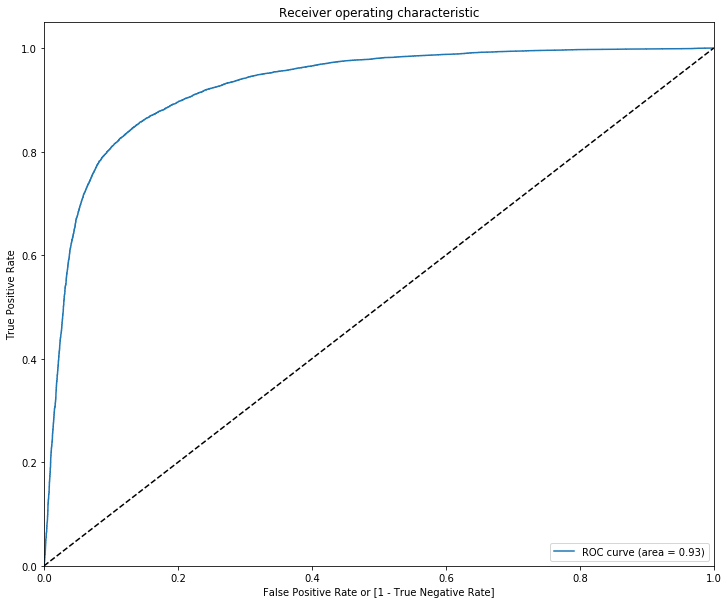

In [254]:
#PLotting the ROC curve
plt.figure(figsize=(12, 10))
draw_roc(y_pred_log_sm.converted, y_pred_log_sm.converted_probability)

Following the definition of ROC curve : 
1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

Considering area for ROC curve and its more closer left hand border, our tests seems accurate and we are good to go further. Lets find optimal cut off point now.

In [255]:
# Let's create columns with different probability cutoffs 
numbers = [round(x * 0.05, 2) for x in range(0, 20)]

y_train_predicted_final = y_pred_log_sm

for i in numbers:
    y_train_predicted_final[i]= y_train_predicted_final.converted_probability.map(lambda x: 1 if x > i else 0)

y_train_predicted_final.head()

,converted,converted_probability,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.002979,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.000196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.780229,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
3,0,0.105504,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.001221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [256]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame(columns=['Accuracy', 'Sensitivity','Specificity'])

for i in numbers:
    confusion = confusion_matrix(y_train_predicted_final.converted, y_train_predicted_final[i] )
    total=sum(sum(confusion))
    accuracy = (confusion[0,0]+confusion[1,1])/total
    
    specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
    cutoff_df.loc[i] =[accuracy, sensitivity, specificity]
    
cutoff_df.head()

,Accuracy,Sensitivity,Specificity
0.00,0.500000,1.000000,0.000000
0.05,0.696978,0.987454,0.406503
0.10,0.742224,0.979873,0.504574
0.15,0.772753,0.971248,0.574259
0.20,0.794527,0.958858,0.630195


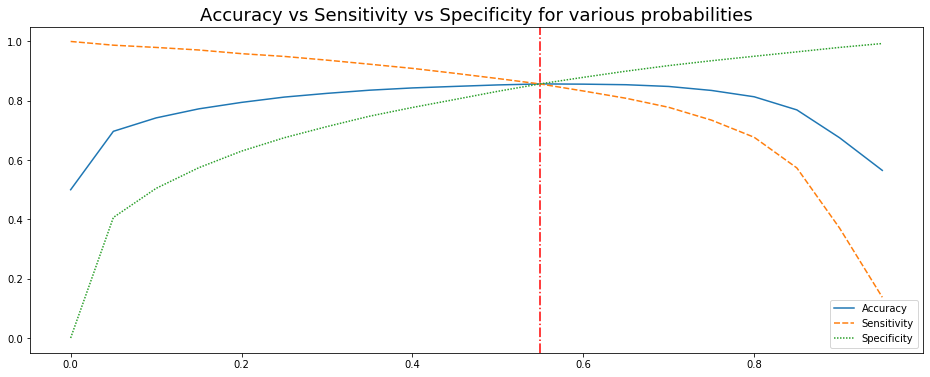

In [257]:
#Let's plot it
plt.figure(figsize=(16, 6))
sns.lineplot(data=cutoff_df)
plt.title('Accuracy vs Sensitivity vs Specificity for various probabilities', fontsize=18)
plt.axvline(0.549, color='r', linestyle='-.')

__From the curve above, 0.549 is the optimum point to take it as a cutoff probability__

Let's find the cut-off probability with Precision-Recall trade-off as well

<h4>Precision and Recall Trade-off</h4>

In [258]:
p, r, thresholds = precision_recall_curve(y_train_predicted_final.converted, y_train_predicted_final.converted_probability)

cutoff_df = pd.DataFrame({'Precision': pd.Series(p[:-1], index=thresholds),
              'Recall':pd.Series(r[:-1], index=thresholds)})
cutoff_df.head()

,Precision,Recall
4.102709e-07,0.501744,1.000000
4.394384e-07,0.501731,0.999948
4.578103e-07,0.501744,0.999948
4.754522e-07,0.501758,0.999948
4.797875e-07,0.501771,0.999948


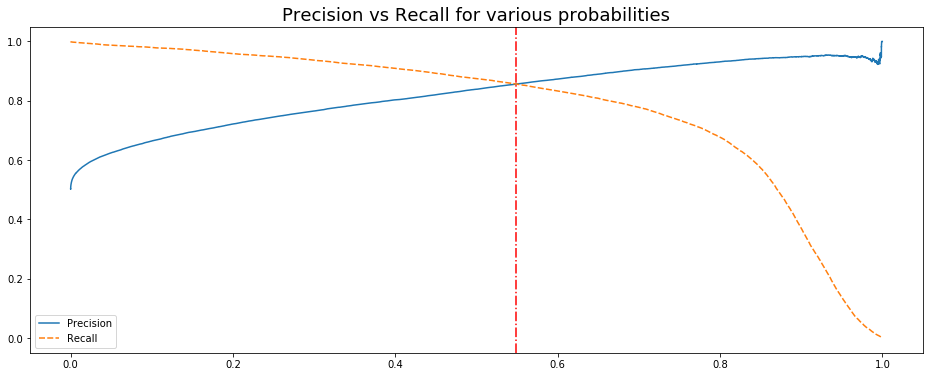

In [259]:
#Plotting the trade-off
plt.figure(figsize=(16, 6))
sns.lineplot(data=cutoff_df)
plt.title('Precision vs Recall for various probabilities', fontsize=18)
plt.axvline(0.549, color='r', linestyle='-.')

__From the curve above, `0.549` is the optimum point to take it as a cutoff probability__

**We are getting same probability cut-offs from both the curves. So let's calculate the metrics**

In [260]:
predicted_final_train = y_train_predicted_final.converted_probability.map( lambda x: 1 if x > 0.549 else 0)

In [261]:
metrics_dataframe(y_train_predicted_final.converted, predicted_final_train)

,Metric,Score
0,Specificity,0.856657
1,Accuracy,0.856762
2,Precision,0.856687
3,Sensitivity/Recall,0.856867
4,False Positive Rate,0.143343
5,Positive Predictive Value,0.856687
6,Negative Predictive Value,0.856837


Let's evaluate our model on the test data

In [262]:
df_test_pca = df_test_pca[df_train_final.columns[1:]]
df_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC26,PC27,PC28,PC29,PC31,PC32,PC33,PC35,PC38,PC41,PC42,PC43,PC44,PC46,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC56,PC57,PC58,PC59,PC60,PC62,PC63,PC64,PC66,PC67,PC70,PC72,PC73,PC74,PC75,PC76,PC80
10922,-738.202514,2422.962418,1871.934419,1448.258862,-1482.932723,151.939408,-654.014907,31.727861,-674.119894,101.084145,327.795030,518.914448,888.105149,-250.215173,-359.150220,-1390.777789,-370.550779,412.450265,-254.449364,-410.852963,79.403099,-495.986263,746.087865,495.232567,316.029877,-312.777605,-631.365622,-240.785449,63.260146,-129.453807,-199.448140,339.649198,-116.265928,48.797990,-50.673792,154.969345,201.228210,-10.013220,263.138119,329.884786,-40.990043,-226.056935,123.820589,-52.221882,51.155369,-49.473254,-81.778714,33.295762,-175.234108,-30.931543,-20.391859,1.945212,180.958832,16.359388,175.505714,135.594822,100.814376,-125.659863,28.214233,-130.161895,187.567067
25621,461.752509,237.572339,7.630325,267.772748,-154.738606,174.888275,82.370551,-46.987109,191.437436,-48.244039,240.557038,785.362343,-333.115019,207.796603,-0.965201,-160.741818,-136.051446,258.513153,-87.519749,28.217709,58.147173,309.733020,-2.347353,-5.127773,126.252540,-54.837568,-410.130466,355.848958,78.121520,-91.536723,11.876539,41.534069,-27.886326,156.909310,-264.834653,-34.084809,-151.721143,-54.526088,-133.835298,3.138368,26.239554,19.662826,18.859690,-9.568576,112.874791,-189.589696,62.955895,-55.998540,-51.706498,37.353539,34.855452,-49.404677,13.354986,5.254232,67.257799,-11.380473,-10.879260,-1.579391,4.082175,-70.408578,2.857793
914,-410.317634,1773.846812,1275.767726,1236.321243,-1241.325857,202.252841,75.615763,280.620439,-350.182178,165.970870,236.541213,626.820891,268.574428,-32.675012,-321.597756,-887.560192,-71.800903,506.035233,373.221159,-159.978165,195.292525,-615.451351,443.666804,-122.261805,364.440630,-104.364800,-559.356267,960.502714,329.240582,-418.764262,185.968622,-111.307802,-43.154637,136.208930,-147.984446,-98.013260,195.654122,-104.084721,-152.073445,305.082493,221.045375,0.181096,495.432405,-43.082292,309.528883,-15.504430,-166.589547,14.588665,-212.200111,-125.702516,94.312610,148.673411,-353.337525,-46.511183,-24.991386,7.575041,-116.128882,37.668550,77.722510,-130.802523,-55.048862
12628,783.544027,816.017092,-143.763718,290.354348,-367.298616,275.401918,130.038317,-350.967448,371.565610,-137.624005,161.128368,732.590936,-574.352470,205.244268,116.024651,-73.455006,-312.166516,313.805847,-343.341211,157.501090,-281.936360,242.590659,96.243204,-41.686975,125.535957,-77.243035,-349.042339,390.875891,59.676005,-245.066060,-171.954143,217.953520,-212.716146,129.077578,-411.501751,36.339942,-271.521096,125.355976,-134.658967,170.901225,6.502127,-47.676915,-33.276695,-239.638423,-56.939199,-204.252782,-73.737413,-81.960377,-65.327620,203.482870,-2.648307,-31.889961,-231.577812,-2.561561,-14.450245,-185.072335,-20.466525,-44.252147,-31.781818,-66.813784,-197.869584
9498,1035.239979,575.883802,184.303257,307.402614,-227.409148,51.694055,222.234881,72.373984,135.055020,-165.044625,-48.292865,21.864547,-46.294455,-33.481936,59.165793,-1.697165,-87.933841,31.435114,26.503643,-240.185389,378.937917,28.190176,20.234455,251.547747,49.104947,22.522837,-81.067663,-99.430883,-30.584266,-22.408894,74.172346,-10.944832,-74.590870,-77.130077,183.194220,-20.758819,14.180090,-98.462906,-44.113759,38.100006,67.086148,105.188524,96.724928,-7.415277,100.815152,-170.883882,-13.178402,-73.842918,-206.296442,-80.110947,103.667805,48.048094,124.713223,20.037526,171.346891,-108.138410,17.615305,-42.636703,-33.190137,-13.934206,56.927833


In [263]:
df_test_pca = sm.add_constant(df_test_pca)

#### Making predictions on the test set

In [264]:
# Make predictions on the test set and store it in the variable 'y_pred_log_sm_test'
y_pred_log_sm_test = pd.DataFrame({'converted':y_test,'converted_probability':sm_final.predict(df_test_pca)})
y_pred_log_sm_test.head()

,converted,converted_probability
10922,0,1.000000e+00
25621,0,3.435531e-30
914,0,1.233534e-136
12628,0,1.000000e+00
9498,0,1.489802e-232


In [265]:
y_pred_log_sm_test['final_predicted'] = y_pred_log_sm_test.converted_probability.map(lambda x: 1 if x > 0.549 else 0)

y_pred_log_sm_test.head()

,converted,converted_probability,final_predicted
10922,0,1.000000e+00,1
25621,0,3.435531e-30,0
914,0,1.233534e-136,0
12628,0,1.000000e+00,1
9498,0,1.489802e-232,0


In [266]:
metrics_dataframe(y_pred_log_sm_test.converted, y_pred_log_sm_test.final_predicted)

,Metric,Score
0,Specificity,0.668334
1,Accuracy,0.685231
2,Precision,0.189568
3,Sensitivity/Recall,0.876033
4,False Positive Rate,0.331666
5,Positive Predictive Value,0.189568
6,Negative Predictive Value,0.983839


From both models of logistic regression we are getting **`Recall`** as **`87%`** and Accuracy as **`68%`**

## Interpretable Model - Decision Tree

In [286]:
#Defining the hyperparameters
params_tree = {"max_depth" : [2,4,5,8,10,12,16], 
          "min_samples_leaf" : range(10,50,10), 
          'max_features': range(10, 50, 10),
          "min_samples_split" : range(10,50,10)}

tree = DecisionTreeClassifier(class_weight='balanced',random_state=100)

# create gridsearch object
model = GridSearchCV(estimator=tree, 
                     cv=5, 
                     param_grid=params_tree, 
                     scoring='recall',
                     verbose=1,
                     return_train_score=True )

#Fitting the model
model.fit(X, y)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2240 out of 2240 | elapsed: 13.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [287]:
#Finding best parameters
model.best_params_

{'max_depth': 2,
 'max_features': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [288]:
#Calculating the score
model.best_score_

0.816037848844173

#### Building the model with optimal hyperparameters

In [290]:
model1  =  DecisionTreeClassifier(class_weight= 'balanced', 
                                  criterion= 'gini',
                                  max_depth=2, 
                                  min_samples_leaf=10,
                                  max_features=20,
                                  min_samples_split=10,
                                  random_state=100)

model1.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=2, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [291]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
from sklearn import tree

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

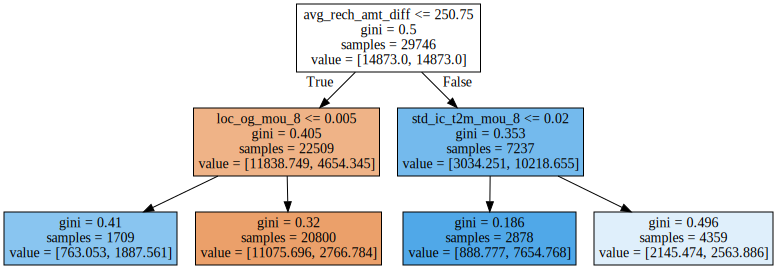

In [292]:
graph = Source(tree.export_graphviz(model1, out_file=None, feature_names=list(X.columns), filled = True))
display(SVG(graph.pipe(format='svg')))

In [293]:
features_importance_df = pd.DataFrame(list(zip(list(X.columns)[:-1], model1.feature_importances_)),
             columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

features_importance_df.head()

,feature,importance
115,avg_rech_amt_diff,0.646800
29,loc_og_mou_8,0.215005
62,std_ic_t2m_mou_8,0.138194
92,max_rech_data_8,0.000000
86,last_day_rch_amt_8,0.000000


__Top features that are influencing churn are:__

- avg_rech_amt_diff
- loc_og_mou_8
- std_ic_t2m_mou_8

## Cost Implication

If using above predictive model, if we could save lets say even 50% of customers and those are high value customers (out of 87% churns we are predicting correctly), we could save lot of revenue leakage. 

Total number of High Value Customers = 30001

Customers who churned (Actual Churn) = 2441

Number of churns predicted correctly by Predictive Model is 87% = 2123 

Lets say cost per customer is =  1000. 

To aquire new customer company have to spend Rs. 1000 per new customer.

If we could save all identified customers we can save  = 2123 * 1000 = Rs. 2123000  + additional revenue by each existing user.


## Recommendation : 

1. Launch special recharge plans which will allow free/very minimal local outgoing calling charges to other networks. it will boost outgoing calls to other networks.

2. Launch Group recharge or Friends/Family group recharge  plans to boost average recharge amount. Also can provide discounts if recharge is for min 60days etc. Customers will stay connected longer and will help to boost average recharge amount per customer.

3. Nowdays , customers are travelling across states in country. So launch special std recharge plans mobile networks so that user get discount in std callings. Along with std calling recharge plan can provide small talktime topup to attract customers having families across states.

4. Launch special discount coupons for selected customers whose existing recharge validity about to end  (talktime or data).
